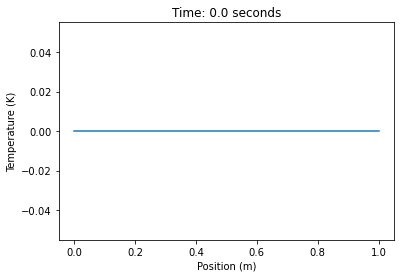

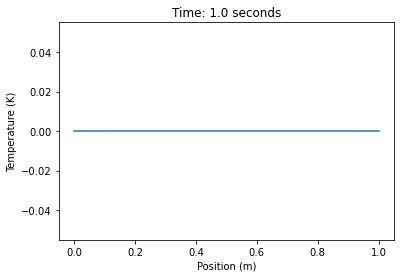

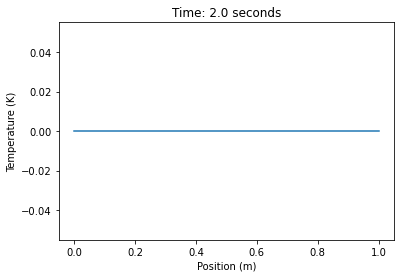

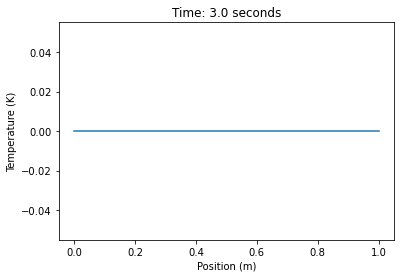

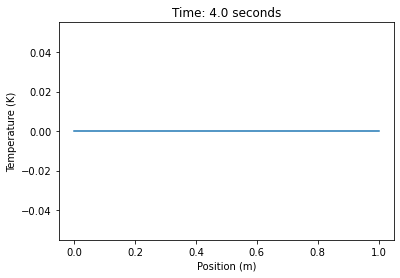

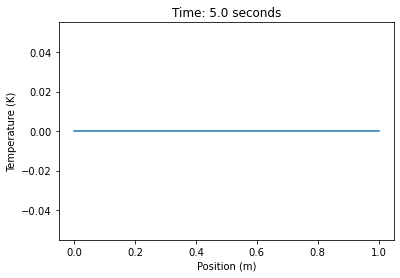

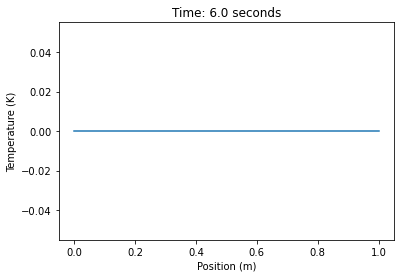

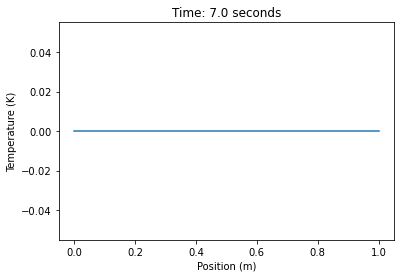

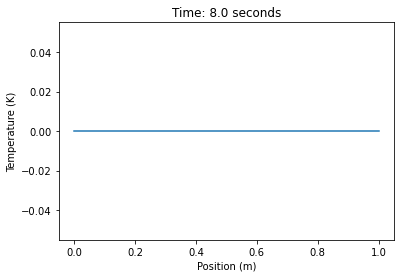

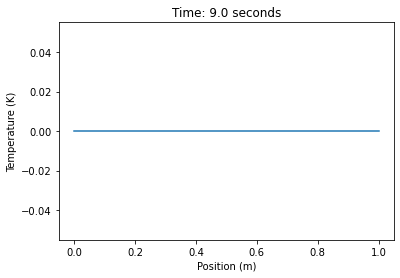

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the aluminum rod
Nx = 100  # Number of spatial nodes
alpha = 1e-4  # Thermal diffusivity
L_fusion = 3.98e5  # Latent heat of fusion for aluminum (J/kg)
c= 900
# Discretization
dx = L / (Nx - 1)
dt = 0.01
T = np.zeros(Nx)  # Initial temperature distribution
phi = np.zeros(Nx)  # Initial phase fraction

# Simulation
for t in range(1000):
    # Explicit finite difference method for heat conduction
    T[1:-1] += alpha * dt / dx**2 * (T[:-2] - 2*T[1:-1] + T[2:])
    
    # Update phase fraction
    phi += dt * L_fusion * np.gradient(T) / (rho * c)  # Assuming rho and c are density and specific heat

    # Visualization
    if t % 100 == 0:
        plt.plot(np.linspace(0, L, Nx), T)
        plt.title(f"Time: {t*dt} seconds")
        plt.xlabel("Position (m)")
        plt.ylabel("Temperature (K)")
        plt.show()



